In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [22]:
!ls ../scores

score_cmnperspk_500ms_noc0.csv score_nocmn_500ms_noc0.csv
score_cmnperutt_500ms_noc0.csv tune_cmnperspk_500ms_noc0.csv
score_nocmn_250ms_noc0.csv


In [31]:
raw_df = pd.read_csv('../tune_cmnperspk_500ms_noc0.csv')
# raw_df = pd.read_csv('../score_cmnperspk_500ms_noc0.csv')
raw_df['qspk'] = raw_df['query'].apply(lambda x: x.split('/')[-2])
raw_df['rspk'] = raw_df['ref'].apply(lambda x: x.split('/')[-2])

print(raw_df.shape)
raw_df = raw_df[raw_df['query'] != raw_df['ref']]
print(raw_df.shape)

(69840, 9)
(69600, 9)


In [32]:
pair = set()
selected = []
for i, r in raw_df.iterrows():
  key1 = (r['query']+r['ref']+str(r['nmfcc']))
  key2 = (r['ref']+r['query']+str(r['nmfcc']))
  if(key1 not in pair and key2 not in pair):
    pair.add(key1)
    pair.add(key2)
    selected.append(True)
  else:
    selected.append(False)
raw_df = raw_df[selected]
print(raw_df.shape)

(69360, 9)


In [33]:
raw_df[(raw_df['label'] == 1)& (raw_df['nmfcc'] == 13)]['dist'].max()

139.4502213874782

In [34]:
raw_df[(raw_df['label'] == 0)& (raw_df['nmfcc'] == 13)]['dist'].min()

60.79833023027962

In [35]:
# for i, e in raw_df[(raw_df['label'] == 1)& (raw_df['nmfcc'] == 13)].iterrows():
#   print(e['query'])
#   print(e['ref'])
#   print(e['dist'])

In [36]:
spk_list = raw_df['query'].apply(lambda x : x.split('/')[-2]).unique().tolist()
spk_list

['fair', 'hawan', 'mix', 'ta', 'krit', 'oong', 'top', 'ake']

In [63]:
avg_thresh = [[],[],[]]
for spk in spk_list:
# for spk in ['fair']:
  print('\n ############## SPK', spk)
#   for nfeat in [5, 8, 9, 10,  13, 20]:
  for j, nfeat in enumerate([8,9,10]):
    
#     df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
    df = raw_df[(raw_df['nmfcc'] == nfeat) & (raw_df['qspk'] == spk)]
#     if(df['label'].sum() == 0):
#       print(spk)
#       break
      
    x = df['dist']
    y = df['ref_len']

    fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
#     plt.scatter(x[(df['label'] == 0)].to_list(), y[(df['label'] == 0)].to_list(), color='red', label='negative', alpha=0.3)
#     plt.scatter(x[(df['label'] == 1)].to_list(), y[(df['label'] == 1)].to_list(), marker='*', color='green', label='positive', alpha=0.5)
#     plt.title(f'dtw normed (nmfcc:{nfeat})')
#     plt.xlabel('distance')
#     plt.ylabel('ref length')
#     plt.legend()
#     plt.show()

#     fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
#     plt.xlabel("FPR")
#     plt.ylabel('TPR')
#     plt.plot(fpr, tpr)
#     plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
#     plt.title(f'ROC : mfcc:{nfeat}')
#     plt.xticks(np.arange(0,1.1,0.1))
#     plt.yticks(np.arange(0,1.1,0.1))
#     plt.show()

    print("nfeat", nfeat)
    print('fpr___ tpr___ threshold')
    for i in range(len(fpr)):
      if(fpr[i] >= 0.05):
        print("{:.4f} {:.4f} {:.4f}".format(fpr[i-1], tpr[i-1], -thresholds[i-1]))
        print("{:.4f} {:.4f} {:.4f}".format(fpr[i], tpr[i], -thresholds[i]))
        avg_thresh[j].append(-thresholds[i-1])
        break
avg_thresh = np.array(avg_thresh)
print(avg_thresh.mean(axis=1), avg_thresh.std(axis=1))


 ############## SPK fair
nfeat 8
fpr___ tpr___ threshold
0.0417 1.0000 68.9386
1.0000 1.0000 153.4423
nfeat 9
fpr___ tpr___ threshold
0.0486 1.0000 76.7698
1.0000 1.0000 159.4009
nfeat 10
fpr___ tpr___ threshold
0.0428 0.6667 78.8798
0.0521 0.6667 81.3900

 ############## SPK hawan
nfeat 8
fpr___ tpr___ threshold
0.0266 0.6667 53.6027
0.4826 0.6667 86.3727
nfeat 9
fpr___ tpr___ threshold
0.0405 0.6667 60.7426
0.5139 0.6667 93.6088
nfeat 10
fpr___ tpr___ threshold
0.0150 0.3333 58.8954
0.0532 0.3333 65.6938

 ############## SPK mix
nfeat 8
fpr___ tpr___ threshold
0.0220 1.0000 68.3084
1.0000 1.0000 128.7218
nfeat 9
fpr___ tpr___ threshold
0.0255 1.0000 74.7374
1.0000 1.0000 139.3965
nfeat 10
fpr___ tpr___ threshold
0.0220 1.0000 79.2215
1.0000 1.0000 147.5860

 ############## SPK ta
nfeat 8
fpr___ tpr___ threshold
0.0266 0.3333 72.2931
0.1597 0.3333 80.9322
nfeat 9
fpr___ tpr___ threshold
0.0278 0.3333 80.4683
0.1389 0.3333 87.5595
nfeat 10
fpr___ tpr___ threshold
0.0359 0.3333 85.6692

help


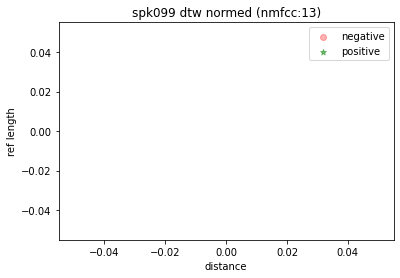

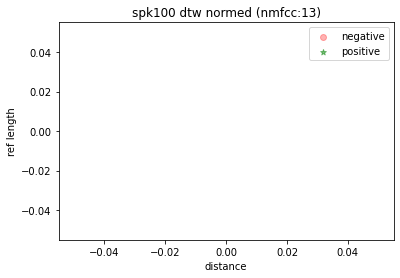

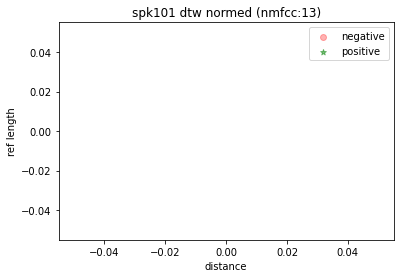

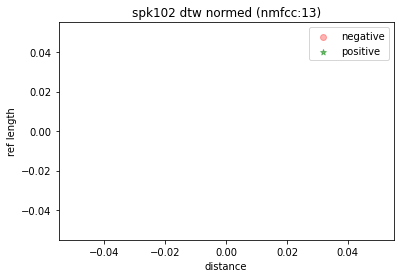

In [476]:
print('help')
# plt.figure(figsize=(25, 70))

for nfeat in [13]:
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) ]
  
  x = df['dist']
  y = df['ref_len']
  

  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#   for spk in spk_list:
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )

    sel_spk = df["query"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5)

    plt.title(f'{spk} dtw normed (nmfcc:{nfeat})')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()
    plt.show()

  
#   plt.subplot(13,5, nfeat*5)
#   fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
#   plt.plot(fpr, tpr)
#   plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
#   plt.title(f'ROC : mfcc:{nfeat}')
#   plt.xticks(np.arange(0,1.1,0.1))
#   plt.yticks(np.arange(0,1.1,0.1))
#   plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc.pdf', bbox_inches='tight')

help


ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

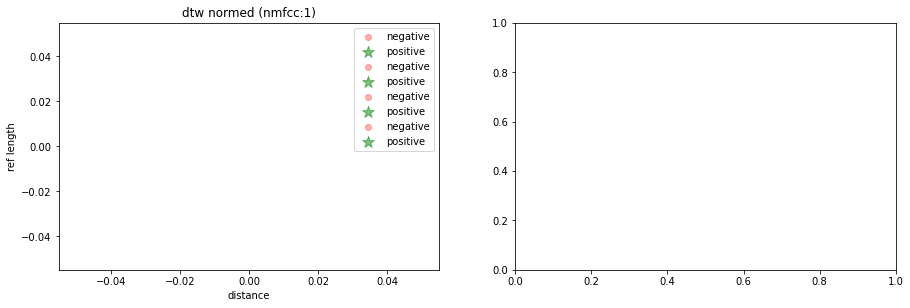

In [12]:
print('help')
plt.figure(figsize=(15, 70))

for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
  plt.subplot(13,2,nfeat*2-1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)

  plt.title(f'dtw normed (nmfcc:{nfeat})')
  plt.xlabel('distance')
  plt.ylabel('ref length')
  plt.legend()

  
#   plt.subplot(13,5, nfeat*5)
  plt.subplot(13,2,nfeat*2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc.pdf', bbox_inches='tight')

help


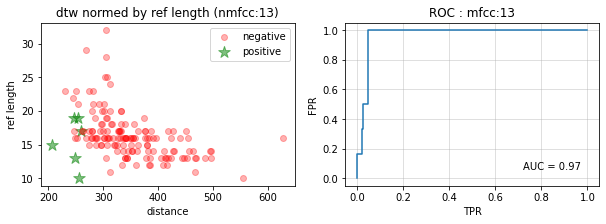

In [54]:
print('help')
plt.figure(figsize=(10, 3))

for nfeat in range(13,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
  plt.subplot(1,2,1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)
    if(i == 0):
      plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
      plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)
    else:
      plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', alpha=0.3)
      plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', alpha=0.5, s=150)

  plt.title(f'dtw normed by ref length (nmfcc:{nfeat})')
  plt.xlabel('distance')
  plt.ylabel('ref length')
  plt.legend()

  
#   plt.subplot(13,5, nfeat*5)
  plt.subplot(1,2,2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
#   plt.xticks(np.arange(0,1.1,0.1))
#   plt.yticks(np.arange(0,1.1,0.1))
  plt.xlabel('TPR')
  plt.ylabel("FPR")

  plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc_13.png', bbox_inches='tight')

help


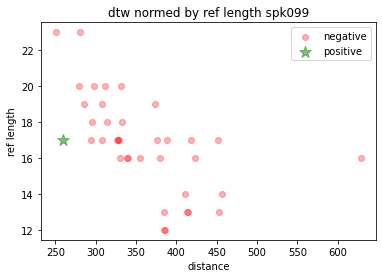

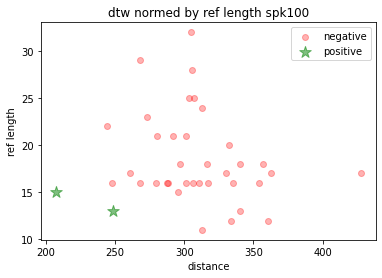

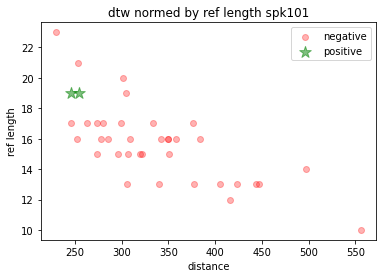

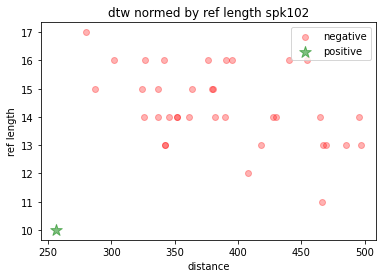

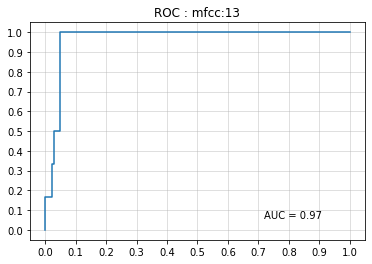

In [48]:
print('help')
# plt.figure(figsize=(10, 3))

for nfeat in range(13,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
#   plt.subplot(1,2,1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(1,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)
      

    plt.title(f'dtw normed by ref length {spk}')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()
    plt.show()

  
#   plt.subplot(13,5, nfeat*5)
#   plt.subplot(1,2,2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
  plt.show()
# plt.savefig('roc_13.png', bbox_inches='tight')